# Entendiendo qué es el riesgo crediticio o ```credit risk```
Consiste en la posibilidad de que una persona que ha prestado plata no te pague toda su deuda

Un credito o prestamo está en ```default``` cuando la agencia esta razonablemente segura de que el cliente no va a pagar su cuenta
## Perdida Esperada o ```Expected Loss``` (EL)
La cantidad que una empresa pierde como resultado del ```loan default```

La perdida esperada es un calculo realizado con los siguientes tres componentes:
- Probabilidad de ```Default``` (```PD```)
- Exposicion al momento del Default (```EAD```) que es la cantidad faltante al momento del ```default```
- Loss Given Default (```LGD```) que es el ratio de la exposicion contra cualquier recuperacion de la perdida. Si un cliente debe 100.000 PYG y se logra vender el prestamo por 20.000 PYG, el LGD será 80%.

La formula de la Perdida Esperada es: $$EL = PD * EAD * LGD$$

## TIpos de Datos disponibles para crear un modelo de ```credit risk assesment```
- De Aplicacion
    - Tasa de Interes
    - Faja
    - Cantidad
- De Comportamiento
    - Hace cuantos años está empleado
    - Defaults anteriores (historial crediticio)
    - Ingresos
    


## Recursos:
- [Financial Analytics: Credit Default Analysis & Predictions](http://rtuttinsights.com/portfolio/financial-analytics-credit-card-default-analysis-predictions/)
- [Making Predictions with Data and Python : Predicting Credit Card Default | packtpub.com](https://www.youtube.com/watch?v=zUqa6KcwRhs)
- [Credit Risk Modeling in Python
](https://www.datacamp.com/courses/credit-risk-modeling-in-python)
- [Home Credit Default Analysis | kaggle](https://www.kaggle.com/ashishpatel26/home-credit-default-analysis)
- [Metodologías de cuantificación del riesgo de crédito](https://accionistaseinversores.bbva.com/microsites/bbva2012/es/Gestiondelriesgo/Metodologiasdecuantificaciondelriesgodecredito.html)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
cr_loan = pd.read_csv("data/cr_loan2.csv")

In [2]:
cr_loan.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [3]:
cr_loan.head(15)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


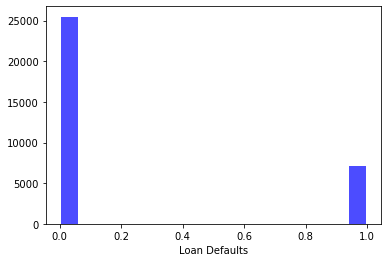

In [4]:
n, bins, patches = plt.hist(x=cr_loan['loan_status'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Defaults")
plt.show()

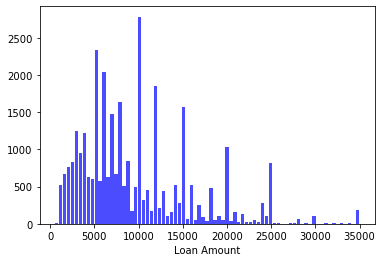

In [5]:
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

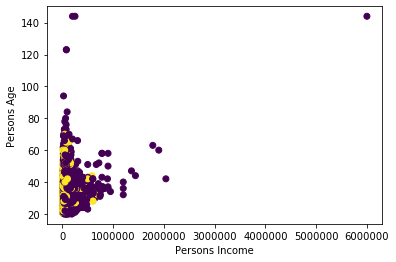

In [6]:
plt.scatter(x=cr_loan['person_income'], y=cr_loan['person_age'], c=cr_loan['loan_status'])
plt.xlabel("Persons Income")
plt.ylabel("Persons Age")
plt.show()

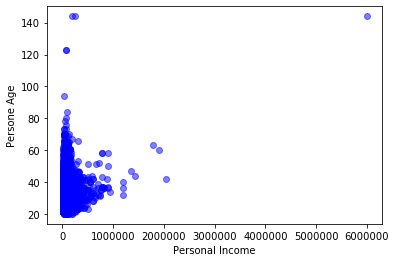

In [7]:
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

Crosstab entre el ```tiempo de empleo de una persona``` y si la persona ```tiene una casa```

In [8]:
print(pd.crosstab(cr_loan['person_emp_length'], cr_loan['person_home_ownership'], margins = True))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT    All
person_emp_length                                         
0.0                        1092     23   324   2666   4105
1.0                         806     16   218   1875   2915
2.0                        1189     11   255   2394   3849
3.0                        1244     12   212   1988   3456
4.0                        1083      9   205   1577   2874
5.0                        1298      9   219   1420   2946
6.0                        1322      9   191   1144   2666
7.0                        1151      3   181    861   2196
8.0                         902      5   161    619   1687
9.0                         791      1    92    483   1367
10.0                        409      2    76    209    696
11.0                        439      4    66    231    740
12.0                        369      1    47    158    575
13.0                        269      0    46    111    426
14.0                        212      0    31     92    3

Crosstab entre ```Intencion del Prestamo``` y si ```pagó o no el prestamo```

In [9]:
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


Crosstab entre si ```fue o no default``` el presamo y el ```grado``` que se le dio al prestamo

In [10]:
print(pd.crosstab(cr_loan['loan_status'], cr_loan['loan_grade'], margins = True))

loan_grade       A      B     C     D    E    F   G    All
loan_status                                               
0             9704   8750  5119  1485  343   71   1  25473
1             1073   1701  1339  2141  621  170  63   7108
All          10777  10451  6458  3626  964  241  64  32581


In [11]:
print(pd.crosstab(cr_loan['person_home_ownership'], [cr_loan['loan_status'], cr_loan['loan_grade']], margins = True))

loan_status               0                                   1              \
loan_grade                A     B     C     D    E   F  G     A     B     C   
person_home_ownership                                                         
MORTGAGE               5219  3729  1934   658  178  36  0   239   324   321   
OTHER                    23    29    11     9    2   0  0     3     5     6   
OWN                     860   770   464   264   26   7  0    66    34    31   
RENT                   3602  4222  2710   554  137  28  1   765  1338   981   
All                    9704  8750  5119  1485  343  71  1  1073  1701  1339   

loan_status                                  All  
loan_grade                D    E    F   G         
person_home_ownership                             
MORTGAGE                553  161   61  31  13444  
OTHER                    11    6    2   0    107  
OWN                      18   31    8   5   2584  
RENT                   1559  423   99  27  16446  
All       

In [12]:
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


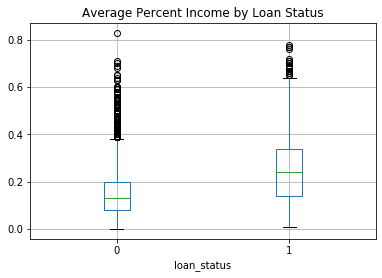

In [13]:
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()